In [1]:
import sys
sys.path.append("..")
import helpers
import feather
import numpy as np
from collections import Counter
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
df_train = feather.read_dataframe("data/df_train.feather")


# Numeric

## flat_size

### Outliers

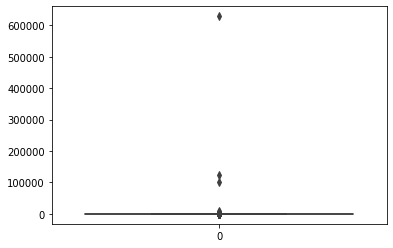

In [3]:
sns.boxplot(data=df_train.flat_size)

In [4]:
from sklearn.cluster import DBSCAN

def outlier_detection(data_df_series):
    outliers_detect = DBSCAN(min_samples = 2, eps = 3)
    clusters = outliers_detect.fit_predict((np.array(data_df_series)).reshape(-1, 1))
    indexes = np.where(clusters==-1)[0]
    values = data_df_series.loc[indexes].values
    return indexes, values


In [5]:
outliers_indexes, outliers_values = outlier_detection(df_train.flat_size)

In [6]:
print("Outliers values by DBSCAN: {}".format(", ".join([str(i) for i in sorted(outliers_values)])))

Outliers values by DBSCAN: 6, 286, 328, 355, 363, 390, 415, 450, 500, 585, 600, 760, 805, 2145, 5197, 8289, 101000, 125000, 628618


In [7]:
med = np.median(df_train.flat_size)
exclude_gt = min([i for i in outliers_values if i > med])
exclude_lt = max([i for i in outliers_values if i < med])

#save 
outliers = {}
outliers['flat_size']= {"min": exclude_lt, "max": exclude_gt}
outliers

print("Exclude when flat size less then {}, and more then {}".format(exclude_lt, exclude_gt))

Exclude when flat size less then 6, and more then 286


### Missing

In [8]:
Counter(df_train.flat_size.isna())

Counter({False: 33368})

### Plot

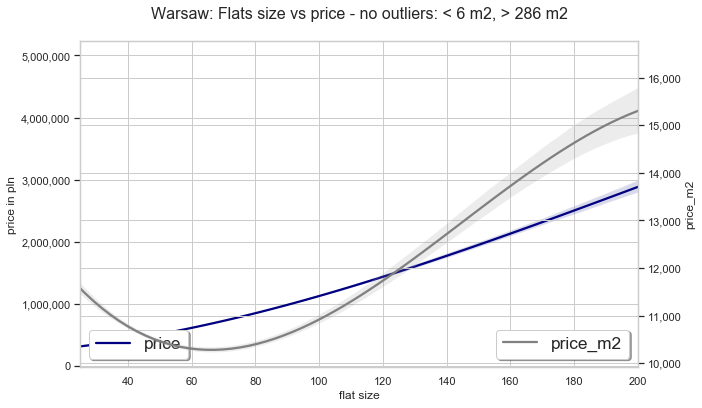

In [9]:
sns.set(style="whitegrid")
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.regplot(data=df_train.query("flat_size>{} and flat_size<{}".format(exclude_lt,exclude_gt)),
             x='flat_size', y='price',ax=ax1,color='navy',label='price', scatter=False, order=3, truncate=True)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.regplot(data=df_train.query("flat_size>{} and flat_size<{}".format(exclude_lt,exclude_gt)),
             x='flat_size', y='price_m2',ax=ax2,color='grey',label='price_m2', scatter=False, order=3, truncate=True)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Warsaw: Flats size vs price - no outliers: < {} m2, > {} m2'.format(exclude_lt,exclude_gt), y=1.05, fontsize = 16)
plt.xlim(25,200)
ax1.set(xlabel='flat size', ylabel='price in pln')
legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-large')
legend = ax2.legend(loc='lower right', shadow=True, fontsize='x-large')
print("")



## GC_longitude (lewa i prawa strona Wisły)

### Outliers

Polands longitude is between 14 and 24

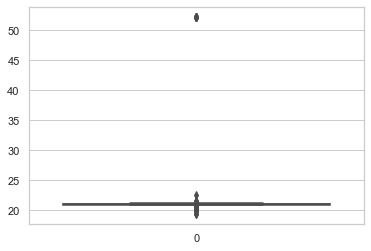

In [10]:
sns.boxplot(data=df_train.GC_longitude)

In [11]:
print(Counter(df_train.GC_longitude > 21.5))
print(Counter(df_train.GC_longitude < 20.5))

Counter({False: 33354, True: 14})
Counter({False: 33338, True: 30})


In [12]:
outliers['GC_longitude'] = {"min":20.5,"max":21.5}

### Missing

In [13]:
Counter(df_train.GC_longitude.isna())

Counter({False: 33368})

### Plot

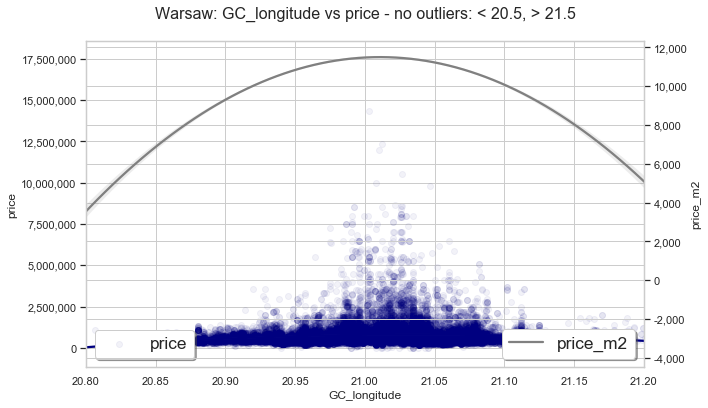

In [14]:
sns.set(style="whitegrid")
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.regplot(data=df_train.query("GC_longitude>={} and GC_longitude<={}".format(
        outliers['GC_longitude']['min'],
        outliers['GC_longitude']['max'])),
             x='GC_longitude', y='price',ax=ax1,color='navy',label='price', 
             scatter=True, order=2, truncate=True,scatter_kws={'alpha':0.05})
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.regplot(data=df_train.query("GC_longitude>={} and GC_longitude<={}".format(
        outliers['GC_longitude']['min'],
        outliers['GC_longitude']['max'])),
             x='GC_longitude', y='price_m2',ax=ax2,color='grey',label='price_m2', scatter=False, order=2, truncate=True)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Warsaw: GC_longitude vs price - no outliers: < {}, > {}'.format(
    outliers['GC_longitude']['min'],outliers['GC_longitude']['max']), y=1.05, fontsize = 16)
ax1.set(xlabel='GC_longitude', ylabel='price')
ax1.set_xlim(20.8, 21.2)
ax1.set_ylim()
ax1.set_ylim()

legend = ax1.legend(loc='lower left', shadow=True, fontsize='x-large')
legend = ax2.legend(loc='lower right', shadow=True, fontsize='x-large')
print("")



## GC_longitude (północ i południe Warszawy)

Polands longitude is between 49 and 55

### Outliers

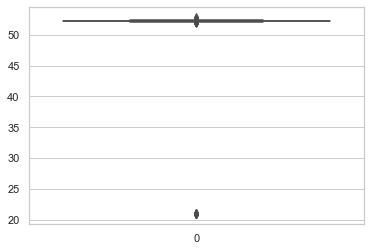

In [15]:
sns.boxplot(data=df_train.GC_latitude)

In [16]:
outliers['GC_latitude'] = {"min":51,"max":52.5}

### Missing


In [17]:
Counter(df_train.GC_latitude.isna())

Counter({False: 33368})

### Plot

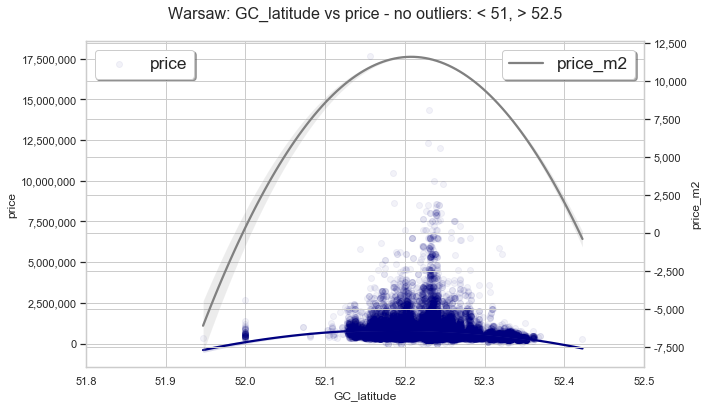

In [18]:
sns.set(style="whitegrid")
import matplotlib as mpl

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.regplot(data=df_train.query("GC_latitude>={} and GC_latitude<={}".format(
        outliers['GC_latitude']['min'],
        outliers['GC_latitude']['max'])),
             x='GC_latitude', y='price',ax=ax1,color='navy',label='price', 
             scatter=True, order=2, truncate=True,scatter_kws={'alpha':0.05})
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sns.regplot(data=df_train.query("GC_latitude>={} and GC_latitude<={}".format(
        outliers['GC_latitude']['min'],
        outliers['GC_latitude']['max'])),
             x='GC_latitude', y='price_m2',ax=ax2,color='grey',label='price_m2', scatter=False, order=2, truncate=True)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Warsaw: GC_latitude vs price - no outliers: < {}, > {}'.format(
    outliers['GC_latitude']['min'],outliers['GC_latitude']['max']), y=1.05, fontsize = 16)
ax1.set(xlabel='GC_latitude', ylabel='price')
ax1.set_xlim(51.8, 52.5)

legend = ax1.legend(loc='upper left', shadow=True, fontsize='x-large')
legend = ax2.legend(loc='upper right', shadow=True, fontsize='x-large')
print("")



## rooms

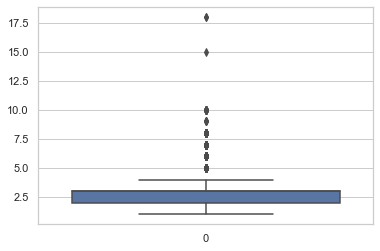

In [19]:
sns.boxplot(data=df_train.rooms)


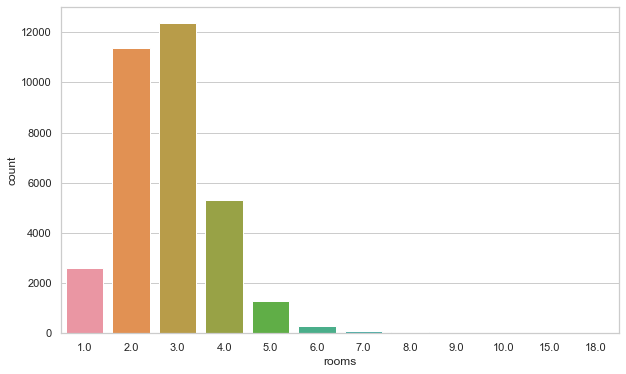

In [20]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.countplot(df_train.rooms)

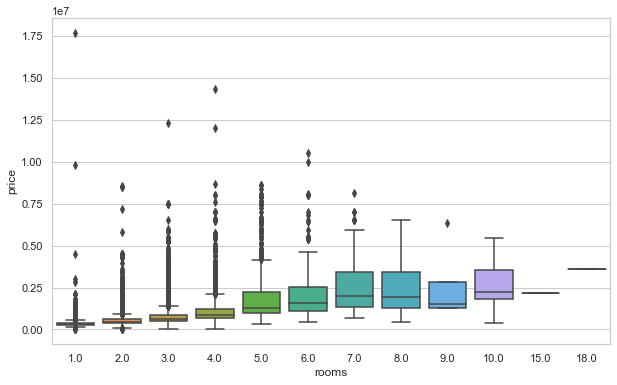

In [21]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.boxplot(data=df_train, x='rooms',y='price')

## year_of_building

### missing

In [22]:
print("Missing values of 'year_of_building' is {0:.0%} percent".format(
    sum(df_train.year_of_building.isna())/len(df_train.year_of_building.isna())))


Missing values of 'year_of_building' is 18% percent


In [23]:
outliers_indexes, outliers_values = outlier_detection(
    df_train.loc[df_train.year_of_building.notna()].reset_index(drop=True).year_of_building)

In [24]:
print("Outliers values by DBSCAN: {}".format(", ".join([str(i) for i in sorted(outliers_values)])))

Outliers values by DBSCAN: 7.0, 60.0, 76.0, 205.0, 976.0, 1017.0, 1029.0, 1092.0, 1195.0, 1660.0, 1669.0, 1730.0, 1850.0, 2109.0, 11996.0, 20000.0, 20119.0


In [25]:
med = np.median(df_train.loc[df_train.year_of_building.notna()].reset_index(drop=True).year_of_building)
exclude_gt = min([i for i in outliers_values if i > med])
exclude_lt = max([i for i in outliers_values if i < med])

#save 
outliers['year_of_building']= {"min": exclude_lt, "max": exclude_gt}

print("Exclude when year_of_building less then {}, and more then {}".format(exclude_lt, exclude_gt))

Exclude when year_of_building less then 1850.0, and more then 2109.0


[Text(0, 0.5, 'year_of_building'), Text(0.5, 0, 'flat size')]

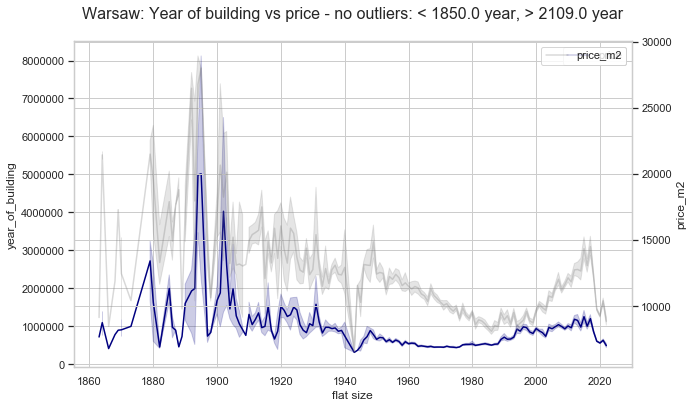

In [26]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

sns.lineplot(data=df_train.loc[df_train.year_of_building.notna()].query(
                "year_of_building>{} and year_of_building<{}".format(exclude_lt,exclude_gt)),
             x='year_of_building', y='price',ax=ax1,color='navy',label='price')

sns.lineplot(data=df_train.loc[df_train.year_of_building.notna()].query(
                "year_of_building>{} and year_of_building<{}".format(exclude_lt,exclude_gt)),
             x='year_of_building', y='price_m2',ax=ax2,color='gray',label='price_m2', alpha=0.3)

plt.title('Warsaw: Year of building vs price - no outliers: < {} year, > {} year'.format(exclude_lt,exclude_gt), y=1.05, fontsize = 16)
ax1.set(xlabel='flat size', ylabel='year_of_building')


### Extract missing from description

In [27]:
def extraxt_year(txt):
    pattern = re.compile(r'[2][0][\d]{2} +|[1][89][\d]{2} +')
    wynik = re.findall(pattern, txt)
    if wynik is None:
        return None
    elif len(wynik)==1:
        return np.int32(wynik[0])
    elif len(wynik)>1:
        return np.int32(min(wynik))
    else:
        return None

In [28]:
df_train=df_train.assign(
    year_of_building_miss = lambda x: x.apply(lambda x: 1 if x.year_of_building==x.year_of_building else 0, axis=1),
    year_of_building = lambda x: x.apply(
        lambda x : x.year_of_building if x.year_of_building==x.year_of_building else extraxt_year(x.description), axis=1)
)

In [29]:
print("Missing values of 'year_of_building' is {0:.0%} percent".format(
    sum(df_train.year_of_building.isna())/len(df_train.year_of_building.isna())))


Missing values of 'year_of_building' is 12% percent


# Category

## GC_addr_postcode

In [30]:
print("number of unique values: {}".format(len(df_train.GC_addr_postcode.unique())))


number of unique values: 2354


###  Missing

In [31]:
Counter(df_train.GC_addr_postcode.isna())

Counter({False: 33124, True: 244})

In [32]:
Counter(df_train.GC_addr_postcode=="")

Counter({False: 33368})

### target encoding

Choose target encoder, later using hyper opt
```
from category_encoders import WOEEncoder, TargetEncoder, CatBoostEncoder, BackwardDifferenceEncoder
from category_encoders import BinaryEncoder,LeaveOneOutEncoder,PolynomialEncoder,SumEncoder
```


## GC_addr_suburb

### Missing

In [33]:
Counter(df_train.GC_addr_suburb.isna())

Counter({False: 33198, True: 170})

[Text(0, 0.5, 'price'), Text(0.5, 0, 'GC_addr_suburb')]

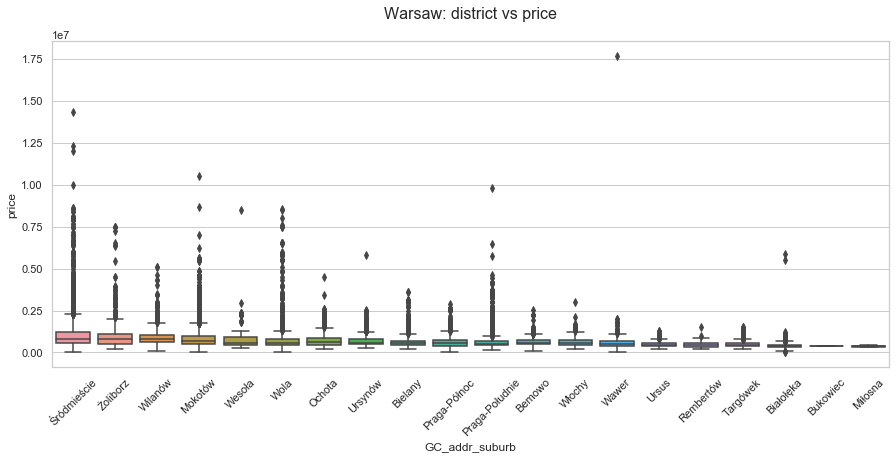

In [34]:
order_list = df_train.groupby('GC_addr_suburb')[['GC_addr_suburb','price']] \
    .agg('mean').reset_index().sort_values('price',ascending=False)['GC_addr_suburb'].tolist()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(15,6))

sns.boxplot(data=df_train, x='GC_addr_suburb',y='price',order=order_list, orient='v')

plt.title('Warsaw: district vs price',y=1.05, fontsize = 16)


plt.xticks(rotation=45)
ax1.set(xlabel='GC_addr_suburb', ylabel='price')

(0, 30000)

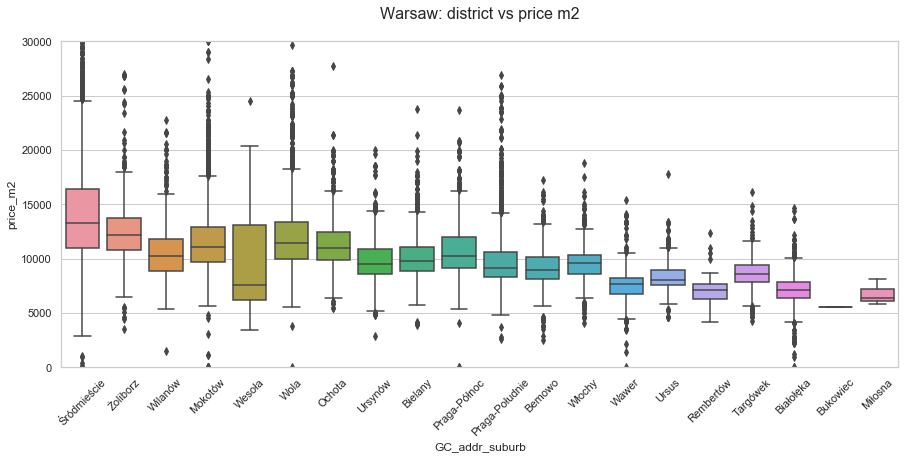

In [35]:
order_list = df_train.groupby('GC_addr_suburb')[['GC_addr_suburb','price']] \
    .agg('mean').reset_index().sort_values('price',ascending=False)['GC_addr_suburb'].tolist()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(15,6))

sns.boxplot(data=df_train, x='GC_addr_suburb',y='price_m2',order=order_list, orient='v')

plt.title('Warsaw: district vs price m2',y=1.05, fontsize = 16)


plt.xticks(rotation=45)
ax1.set(xlabel='GC_addr_suburb', ylabel='price_m2')
ax1.set_ylim(0, 30000)


# Text

## description

In [46]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import lightgbm as lgb

#import eli5


In [47]:
params = {'colsample_bytree': 0.6624318354159208, #feature_fraction
 'learning_rate': 0.15990411055449805,
 'max_bin': 38712,
 'max_depth': 7,
 'min_child_samples': 84, #min_data_in_leaf
 'min_child_weight': 6, #min_sum_hessian_in_leaf
 'n_estimators': 206, #num_iterations
 'num_leaves': 159,
 'reg_alpha': 3.960667919705787e-06, #lambda_l1
 'reg_lambda': 499.85995495490215, #lambda_l2
 'subsample': 0.9022680042341511, #bagging_fraction
 'subsample_for_bin': 144116, #bin_construct_sample_cnt
 'subsample_freq': 0 #bagging_freq
         } 
pipe = make_pipeline(
    ColumnTransformer([
        ('txt_description', TfidfVectorizer(lowercase=True,
                                     ngram_range=(1, 3),
                                     max_features=1000,
                                     dtype=np.float32,
                                     use_idf=True), 'description'),
    ]),
    lgb.LGBMRegressor(**params, objective='regression_l2', random_state=666)
)

In [48]:
%%time
pipe.fit(df_train, df_train.price)


CPU times: user 4min 1s, sys: 8.55 s, total: 4min 9s
Wall time: 2min 34s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('txt_description', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float32'>, encoding='utf...     silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,
       subsample_freq=0))])

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error
y_pred = pipe.predict(df_train)

r2 = r2_score(df_train.price, y_pred)
med_abs_err = median_absolute_error(df_train.price, y_pred)
mean_abs_err = mean_absolute_error(df_train.price, y_pred)
print("Train set r2 score {}, median absolute error {}, "
      "mean absolute error {}".format(round(r2, 4), int(med_abs_err),
                                      int(mean_abs_err)))

Train set r2 score 0.7529, median absolute error 94629, mean absolute error 163504


In [50]:
from eli5 import show_weights, explain_weights_lightgbm
explain_weights_lightgbm(pipe.named_steps['lgbmregressor'], 
             feature_names = pipe.named_steps['columntransformer'].get_feature_names(),
             top=50,)

Weight,Feature
0.1849,txt_description__apartament
0.0895,txt_description__apartamentu
0.0781,txt_description__mieszkanie
0.0301,txt_description__taras
0.0270,txt_description__pierwotny
0.0200,txt_description__plastikowe
0.0192,txt_description__blok
0.0162,txt_description__market pierwotny
0.0150,txt_description__kamienica
0.0141,txt_description__garderoba


In [51]:
import eli5
eli5.explain_prediction(pipe.named_steps['lgbmregressor'], df_train[['description']].loc[999].values[0], 
                     vec=pipe.named_steps['columntransformer'].named_transformers_['txt_description'], top = 40)


Explanation(estimator="LGBMRegressor(boosting_type='gbdt', class_weight=None,\n       colsample_bytree=0.6624318354159208, importance_type='split',\n       learning_rate=0.15990411055449805, max_bin=38712, max_depth=7,\n       min_child_samples=84, min_child_weight=6, min_split_gain=0.0,\n       n_estimators=206, n_jobs=-1, num_leaves=159,\n       objective='regression_l2', random_state=666,\n       reg_alpha=3.960667919705787e-06, reg_lambda=499.85995495490215,\n       silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,\n       subsample_freq=0)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=753463.9125200642, std=None, value=1.0), FeatureWeight(feature='mieszkanie', weight=102006.41627462136, std=None, value=0.0), FeatureWeight(feature='najbardziej', weight=90756.04066197912, std=None, value=0.11555342376232147), FeatureWeight(feature='apartamentowiec', weight=55550.0848440705, std=None, value=0.06701336055994034), FeatureWeight(feature='garazu', weight=29359.01719300967, std=None, value=0.0653425082564354), FeatureWeight(feature='osiedla', weight=21959.287406633885, std=None, value=0.0), FeatureWeight(feature='blok', weight=18356.902292905677, std=None, value=0.0), FeatureWeight(feature='budynku', weight=17682.35784370103, std=None, value=0.10832343250513077), FeatureWeight(feature='winda', weight=15197.789887355373, std=None, value=0.04917193949222565), FeatureWeight(feature='plastikowe', weight=14524.692716422513, std=None, value=0.0), FeatureWeight(feature='warszawy', weight=14495.235485101683, std=None, value=0.07130372524261475), FeatureWeight(feature='tej', weight=12686.241470602816, std=None, value=0.18800006806850433), FeatureWeight(feature='lokalizacja', weight=12412.80186743922, std=None, value=0.058946721255779266), FeatureWeight(feature='kontaktu', weight=12329.891020369449, std=None, value=0.07091479748487473), FeatureWeight(feature='informacje', weight=12035.61372523102, std=None, value=0.08062656223773956), FeatureWeight(feature='bez', weight=9681.494112259294, std=None, value=0.06951804459095001)], neg=[FeatureWeight(feature='pierwotny', weight=-74945.11517150556, std=None, value=0.07497479021549225), FeatureWeight(feature='prowizji', weight=-72891.51824381136, std=None, value=0.08473535627126694), FeatureWeight(feature='lub', weight=-57260.120760280406, std=None, value=0.06882528960704803), FeatureWeight(feature='apartament', weight=-56966.688893930004, std=None, value=0.0), FeatureWeight(feature='inwestycja', weight=-30636.7954757809, std=None, value=0.16232088208198547), FeatureWeight(feature='restauracje', weight=-29184.119240345753, std=None, value=0.08388469368219376), FeatureWeight(feature='blisko', weight=-25227.704538521626, std=None, value=0.08313124626874924), Feat

In [52]:
import eli5
eli5.explain_prediction(pipe.named_steps['lgbmregressor'], df_train[['description']].loc[2000].values[0], 
                     vec=pipe.named_steps['columntransformer'].named_transformers_['txt_description'], top = 40)


Explanation(estimator="LGBMRegressor(boosting_type='gbdt', class_weight=None,\n       colsample_bytree=0.6624318354159208, importance_type='split',\n       learning_rate=0.15990411055449805, max_bin=38712, max_depth=7,\n       min_child_samples=84, min_child_weight=6, min_split_gain=0.0,\n       n_estimators=206, n_jobs=-1, num_leaves=159,\n       objective='regression_l2', random_state=666,\n       reg_alpha=3.960667919705787e-06, reg_lambda=499.85995495490215,\n       silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,\n       subsample_freq=0)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=753463.9125200642, std=None, value=1.0), FeatureWeight(feature='drewniane', weight=68636.91666253915, std=None, value=0.04765746369957924), FeatureWeight(feature='sklada', weight=32810.277541765696, std=None, value=0.0), FeatureWeight(feature='14', weight=19466.083443122436, std=None, value=0.052087392657995224), FeatureWeight(feature='parkiet', weight=18933.438520434433, std=None, value=0.10429868847131729), FeatureWeight(feature='dwustronne', weight=17547.898508033588, std=None, value=0.05482267588376999), FeatureWeight(feature='wc', weight=15229.93921162891, std=None, value=0.038018979132175446), FeatureWeight(feature='warszawy', weight=13735.460848727485, std=None, value=0.03860367834568024), FeatureWeight(feature='standard', weight=12095.138113970293, std=None, value=0.049197833985090256), FeatureWeight(feature='lazienki', weight=9317.068755842016, std=None, value=0.03525824844837189), FeatureWeight(feature='ktory', weight=8160.089106500006, std=None, value=0.061360668390989304), FeatureWeight(feature='zielone', weight=7138.118285461556, std=None, value=0.051294393837451935), FeatureWeight(feature='sklada sie', weight=6931.241686923909, std=None, value=0.0), FeatureWeight(feature='50', weight=6512.119197315927, std=None, value=0.11050320416688919), FeatureWeight(feature='okna', weight=6228.413592561302, std=None, value=0.029466254636645317)], neg=[FeatureWeight(feature='apartament', weight=-54695.11969539951, std=None, value=0.0), FeatureWeight(feature='taras', weight=-23840.642915216336, std=None, value=0.0), FeatureWeight(feature='garazu', weight=-21312.655511700854, std=None, value=0.0), FeatureWeight(feature='kamienica', weight=-19945.277116009096, std=None, value=0.0), FeatureWeight(feature='kuchni', weight=-19078.708810855176, std=None, value=0.07071469724178314), FeatureWeight(feature='apartamentu', weight=-16656.017121766698, std=None, value=0.0), FeatureWeight(feature='azienka', weight=-15481.594894260445, std=None, value=0.0477181077003479), FeatureWeight(feature='przystanek', weight=-14915.765375059693, std=None, value=0.048652488738298416), FeatureWeight(feature='rodzaj', weight=-13008.299

Apply to preprocesiing:
* text stemming - ???
* year of building - regrex from text

